In [2]:
#Classify hemolytic/nonhemolytic peptides, PCA and nearest neighbor search

#Data from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3964980/

import numpy as np
import pandas as pd
import keras
from keras.preprocessing.sequence import pad_sequences

In [71]:
from Bio import SeqIO
import numpy as np 

positives_train=[]
negatives_train=[]
positives_test=[]
negatives_test=[]


for seq_record in SeqIO.parse('pos.fa.txt', "fasta"):
    
    positives_train.append(str(seq_record.seq))
    
for seq_record in SeqIO.parse('neg.fa.txt', "fasta"):
    
    negatives_train.append(str(seq_record.seq))
    
for seq_record in SeqIO.parse('negt.fa.txt', "fasta"):
    
    negatives_test.append(str(seq_record.seq)) 
    
for seq_record in SeqIO.parse('post.fa.txt', "fasta"):
    
    positives_test.append(str(seq_record.seq))
    
    
    
X_train=list(positives_train+negatives_train)

y_train=list(np.ones(np.array(positives_train).shape[0]))+list(np.zeros(np.array(negatives_train).shape[0]))

X_test=list(positives_test+negatives_test)

y_test=list(np.ones(np.array(positives_test).shape[0]))+list(np.zeros(np.array(negatives_test).shape[0]))


In [6]:
import numpy as np
import re
def string_to_array(my_string):
    my_string = my_string.lower()
    my_string = re.sub('[^arndcqeghilkmfpstwyvx]', 'z', my_string)
    my_array = np.array(list(my_string))
    return my_array

# create a label encoder with alphabet
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(np.array(['a','r','n','d','c','q','e','g','h','i','l','k','m','f','p','s','t','w','y','v','x','z']))

def ordinal_encoder(my_array):
    integer_encoded = label_encoder.transform(my_array)
    float_encoded = integer_encoded.astype(float)
    float_encoded[float_encoded == 0] = 1.25 # A
    float_encoded[float_encoded == 1] = 2.50 # R
    float_encoded[float_encoded == 2] = 3.75 # N
    float_encoded[float_encoded == 3] = 4.30 # D
    float_encoded[float_encoded == 4] = 5.45 # C
    float_encoded[float_encoded == 5] = 6.35 # Q
    float_encoded[float_encoded == 6] = 7.85 # E 
    float_encoded[float_encoded == 7] = 8.65 # G
    float_encoded[float_encoded == 8] = 9.95 # H
    float_encoded[float_encoded == 9] = 11.25 # I
    float_encoded[float_encoded == 10] = 12.55 # L
    float_encoded[float_encoded == 11] = 13.15 # K
    float_encoded[float_encoded == 12] = 14.11 # L
    float_encoded[float_encoded == 13] = 15.29 # K
    float_encoded[float_encoded == 14] = 16.39 # M
    float_encoded[float_encoded == 15] = 17.05 # F
    float_encoded[float_encoded == 16] = 18.09 # P
    float_encoded[float_encoded == 17] = 19.49 # S
    float_encoded[float_encoded == 18] = 20.79 # T
    float_encoded[float_encoded == 19] = 21.19 # W
    float_encoded[float_encoded == 20] = 22.55 # Y
    float_encoded[float_encoded == 21] = 23.95 # V
    float_encoded[float_encoded == 22] = 24.45 # X
    float_encoded[float_encoded == 10] = 0.0 # anything else z
    

    return float_encoded

In [7]:
X=list(X_train)
y=list(y_train)

for i in X_test : 
    X.append(i)
    
for i in y_test : 
    y.append(i)    
    

X=[np.array(ordinal_encoder(string_to_array(i))) for i in X]
X=np.array(X)
X=pad_sequences(X)

X=X.reshape(X.shape[0],X.shape[1],1)
y_train=np.array(y)

/opt/miniconda3/envs/python2/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if sys.path[0] == '':


In [26]:
X.shape

(1104, 98, 1)

In [28]:
y=np.array(y)

In [29]:
y.shape

(1104,)

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
ytrain_2 = keras.utils.to_categorical(y_train)
y_test_2 = keras.utils.to_categorical(y_test)

In [58]:
y_test_2.shape

(365, 2)

In [59]:
import keras

NUM_CLASSES = 2

# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv1D,  Flatten, Dense, Activation, Dropout,BatchNormalization,LSTM, MaxPool1D
from keras.layers.advanced_activations import LeakyReLU

In [60]:
def make_model():
    """
    Define your model architecture here.
    Returns `Sequential` model.
    """
    model = Sequential()
    
    model.add(Conv1D(input_shape=X_train[0].shape,padding="same",kernel_size=3,filters=16))
    model.add(LSTM(100, return_sequences=True))
    model.add(MaxPool1D())
    model.add(LeakyReLU(0.1))
    model.add(BatchNormalization())


    
    
    model.add(Conv1D(padding="same",kernel_size=3,filters=32))
    model.add(LeakyReLU(0.1))
    model.add(BatchNormalization())


    model.add(Dropout(0.25))
    model.add(Conv1D(padding="same",kernel_size=3,filters=32))
    model.add(MaxPool1D())
    model.add(LeakyReLU(0.1))
    model.add(BatchNormalization())

    model.add(Conv1D(padding="same",kernel_size=3,filters=64))
    model.add(MaxPool1D())
    model.add(LeakyReLU(0.1))
    model.add(BatchNormalization())

    model.add(Dropout(0.25))
    model.add(Flatten())
    
    model.add(Dense(256))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(2))
    model.add(LeakyReLU(0.1))
    
    model.add(Activation("softmax"))
    
    return model

In [61]:
model = make_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_37 (Conv1D)           (None, 98, 16)            64        
_________________________________________________________________
lstm_10 (LSTM)               (None, 98, 100)           46800     
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 49, 100)           0         
_________________________________________________________________
leaky_re_lu_55 (LeakyReLU)   (None, 49, 100)           0         
_________________________________________________________________
batch_normalization_37 (Batc (None, 49, 100)           400       
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 49, 32)            9632      
_________________________________________________________________
leaky_re_lu_56 (LeakyReLU)   (None, 49, 32)            0         
__________

In [62]:
from keras import backend as K
INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 32
EPOCHS = 200


# don't call K.set_learning_phase() !!! (otherwise will enable dropout in train/test simultaneously)
model = make_model()  # define our model

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 2-way classification
    optimizer=keras.optimizers.Adamax(lr=INIT_LR),  # for SGD
    metrics=['accuracy']  # report accuracy during training
)

# fit model
history = model.fit(
    X_train, ytrain_2,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    
    validation_data=(X_test, y_test_2),
    shuffle=True,
    verbose=1
)

Train on 739 samples, validate on 365 samples
Epoch 1/200
739/739 [==============================] - 9s 12ms/step - loss: 0.7658 - acc: 0.5264 - val_loss: 0.6877 - val_acc: 0.5973
Epoch 2/200
739/739 [==============================] - 4s 5ms/step - loss: 0.6786 - acc: 0.5927 - val_loss: 0.6660 - val_acc: 0.5644
Epoch 3/200
739/739 [==============================] - 4s 5ms/step - loss: 0.6596 - acc: 0.6225 - val_loss: 0.6538 - val_acc: 0.5973
Epoch 4/200
739/739 [==============================] - 4s 5ms/step - loss: 0.6654 - acc: 0.6319 - val_loss: 0.6332 - val_acc: 0.6329
Epoch 5/200
739/739 [==============================] - 4s 5ms/step - loss: 0.6300 - acc: 0.6401 - val_loss: 0.6992 - val_acc: 0.5671
Epoch 6/200
739/739 [==============================] - 4s 5ms/step - loss: 0.6185 - acc: 0.6806 - val_loss: 0.6348 - val_acc: 0.6192
Epoch 7/200
739/739 [==============================] - 4s 5ms/step - loss: 0.6051 - acc: 0.6712 - val_loss: 0.6117 - val_acc: 0.6767
Epoch 8/200
739/739 [=

Epoch 62/200
739/739 [==============================] - 4s 5ms/step - loss: 0.1084 - acc: 0.9526 - val_loss: 1.2019 - val_acc: 0.6986
Epoch 63/200
739/739 [==============================] - 4s 5ms/step - loss: 0.1238 - acc: 0.9567 - val_loss: 0.6875 - val_acc: 0.7918
Epoch 64/200
739/739 [==============================] - 4s 5ms/step - loss: 0.0956 - acc: 0.9621 - val_loss: 0.6683 - val_acc: 0.7808
Epoch 65/200
739/739 [==============================] - 4s 5ms/step - loss: 0.0671 - acc: 0.9783 - val_loss: 1.1061 - val_acc: 0.7260
Epoch 66/200
739/739 [==============================] - 4s 5ms/step - loss: 0.0518 - acc: 0.9838 - val_loss: 0.8743 - val_acc: 0.7836
Epoch 67/200
739/739 [==============================] - 4s 5ms/step - loss: 0.0507 - acc: 0.9783 - val_loss: 0.6498 - val_acc: 0.8466
Epoch 68/200
739/739 [==============================] - 4s 5ms/step - loss: 0.0509 - acc: 0.9838 - val_loss: 0.6838 - val_acc: 0.8247
Epoch 69/200
739/739 [==============================] - 4s 5ms

Epoch 123/200
739/739 [==============================] - 4s 6ms/step - loss: 0.0322 - acc: 0.9851 - val_loss: 0.6728 - val_acc: 0.8548
Epoch 124/200
739/739 [==============================] - 4s 6ms/step - loss: 0.0243 - acc: 0.9959 - val_loss: 0.7770 - val_acc: 0.8164
Epoch 125/200
739/739 [==============================] - 4s 6ms/step - loss: 0.0261 - acc: 0.9932 - val_loss: 0.7182 - val_acc: 0.8466
Epoch 126/200
739/739 [==============================] - 4s 5ms/step - loss: 0.0232 - acc: 0.9932 - val_loss: 0.7554 - val_acc: 0.8301
Epoch 127/200
739/739 [==============================] - 4s 6ms/step - loss: 0.0234 - acc: 0.9932 - val_loss: 0.8179 - val_acc: 0.8219
Epoch 128/200
739/739 [==============================] - 4s 6ms/step - loss: 0.0296 - acc: 0.9878 - val_loss: 0.7556 - val_acc: 0.8384
Epoch 129/200
739/739 [==============================] - 4s 6ms/step - loss: 0.0212 - acc: 0.9946 - val_loss: 0.7369 - val_acc: 0.8493
Epoch 130/200
739/739 [==============================] 

739/739 [==============================] - 4s 5ms/step - loss: 0.0309 - acc: 0.9892 - val_loss: 0.9506 - val_acc: 0.8630
Epoch 184/200
739/739 [==============================] - 4s 5ms/step - loss: 0.0457 - acc: 0.9811 - val_loss: 1.2575 - val_acc: 0.7836
Epoch 185/200
739/739 [==============================] - 4s 5ms/step - loss: 0.0398 - acc: 0.9865 - val_loss: 0.9747 - val_acc: 0.8274
Epoch 186/200
739/739 [==============================] - 4s 5ms/step - loss: 0.0218 - acc: 0.9905 - val_loss: 0.9008 - val_acc: 0.8548
Epoch 187/200
739/739 [==============================] - 4s 5ms/step - loss: 0.0373 - acc: 0.9932 - val_loss: 0.9292 - val_acc: 0.8356
Epoch 188/200
739/739 [==============================] - 4s 5ms/step - loss: 0.0353 - acc: 0.9878 - val_loss: 0.8906 - val_acc: 0.8466
Epoch 189/200
739/739 [==============================] - 4s 5ms/step - loss: 0.0166 - acc: 0.9973 - val_loss: 0.8888 - val_acc: 0.8384
Epoch 190/200
739/739 [==============================] - 4s 5ms/step 

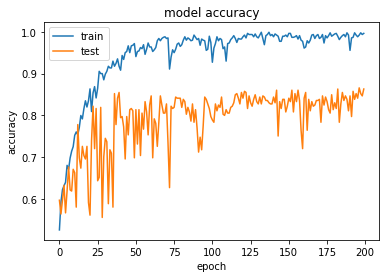

In [63]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [65]:
test_predictions = model.predict(X_test).argmax(axis=-1)

In [67]:
test_answers = y_test_2.argmax(axis=-1)

In [68]:
test_accuracy = np.mean(test_predictions==test_answers)

In [69]:
print(str(test_accuracy*100)+"%")

86.3013698630137%


In [78]:
with open("smileshemo.txt") as file:
    lines = file.readlines()
    lines = [line.rstrip() for line in lines]

In [84]:
smiles = lines

import numpy as np

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs


mols=[Chem.MolFromSmiles(i) for i in smiles] 

for mol in mols:
    AllChem.Compute2DCoords(mol)
X = []
for mol in mols:
    arr = np.zeros((0,))
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
    DataStructs.ConvertToNumpyArray(fp, arr)
    X.append(arr)

In [85]:
import sklearn
from sklearn.decomposition import PCA
import numpy as np

X=np.array(X)

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [86]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

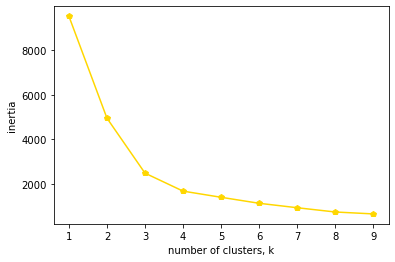

In [89]:
#Elbo method for selecting optimal number of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k,       )
    
    # Fit model to samples
    model.fit(X_pca)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

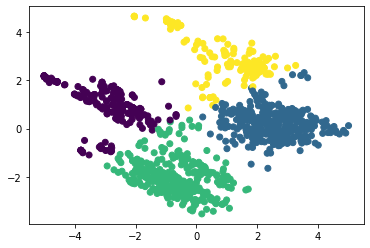

In [94]:
model = KMeans(n_clusters=4)
model.fit(X_pca)

labels = model.predict(X_pca)
plt.scatter(X_pca.T[0], X_pca.T[1], c=labels)
plt.show()

In [95]:
#Find similar peptides using nearest neighbors

from sklearn.neighbors import NearestNeighbors

neigh=NearestNeighbors(n_neighbors=4, radius=0.4, algorithm='kd_tree').fit(X_pca)

In [98]:
#Find similar peptides to the fifth peptide(i=5)

i=5

neigh.kneighbors([X_pca[i-1]], 4)

(array([[0.        , 0.05180608, 0.07057484, 0.09052351]]),
 array([[  4, 651, 803, 127]]))

In [99]:
import numpy as np
from rdkit.Chem import Descriptors
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def generate(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_MolWt = Descriptors.MolWt(mol)
        desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)
           
        row = np.array([desc_MolLogP,
                        desc_MolWt,
                        desc_NumRotatableBonds])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MolLogP","MolWt","NumRotatableBonds"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [100]:
df = generate(smiles)
df

,MolLogP,MolWt,NumRotatableBonds
0,-5.43720,2048.598,71.0
1,-6.31320,3075.830,109.0
2,3.11990,1285.602,41.0
3,1.07110,1948.695,79.0
4,-14.59450,3121.687,92.0
...,...,...,...
1099,-7.55160,2778.159,93.0
1100,-11.29140,2886.244,91.0
1101,-7.37530,1224.338,35.0
1102,-8.27730,2948.356,94.0
